# Correlating Cell Nucleus Characteristics with Tumor Outcome

Student names: Guido Braam (13565796), Prishent Dhoeme (12868485), Yasmina El Kacemi (13783882) &
Gregorius K. W. de Wild (13790919)

Team B3

##Introduction
####  In 1992, a physician named William H. Wolberg collected measurings from patients with a tumor in the breast. A total of 569 female patients were researched. The goal of the research was to map out the specific properties of tumor cells. To investigate these properties, a Fine Needle Apirate (FNA) of the breast mass was taken and a digitized image was created.

#### The following properties in the cell nucleus of the tumor were examined in each patient: radius, perimeter, area, compactness, concavity, concave points, texture, smoothness, symmetry and fractal dimension. Additionally, the recording includes information on whether the tumor was benign or malignant.

#### Using this dataset, we visually investigate whether there is a correlation between the properties of cell nuclei and the malignancy of the tumor. We adopt a confirmatory approach. Along with that, we have defined two potential perspectives (ie. hypotheses) for this data narrative.

##Dataset and Preprocessing

We used the dataset as obtained, because it did not need to be cleaned or otherwise altered.

This dataset was obtained from: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Variables in the dataset:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values were recorded with four decimals.



---


##Our first perspective
### Finding correlations within the dataset can provide valuable insights into tumor behavior. By understanding the relationship between specific traits of a tumor, they can be identified as either malignant or benign. Unraveling these correlations will improve future diagnoses, leading to more accurate and effective treatment responses for female patients battling tumors.


---


##Our second perspective
### The specific traits of a tumor have limited predictive value in determining malignancy due to the complex nature of cancer progression. This dataset may provide insights into correlations between these traits and the diagnosis, but it is insufficient for identifying malignancy. Therefore, relying solely on these patterns and markers to indicate tumor malignancy is ineffective in aiding future diagnoses. A comprehensive understanding and accurate prediction of malignancy requires considering a broader range of data and factors.


---
<br>

####-- Let's start by importing libraries, the dataset and our first visualization.


In [ ]:
# Importing libraries
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
from ipywidgets import widgets, HBox, VBox, Output
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from IPython.display import display, clear_output


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Scatter Plot Matrix

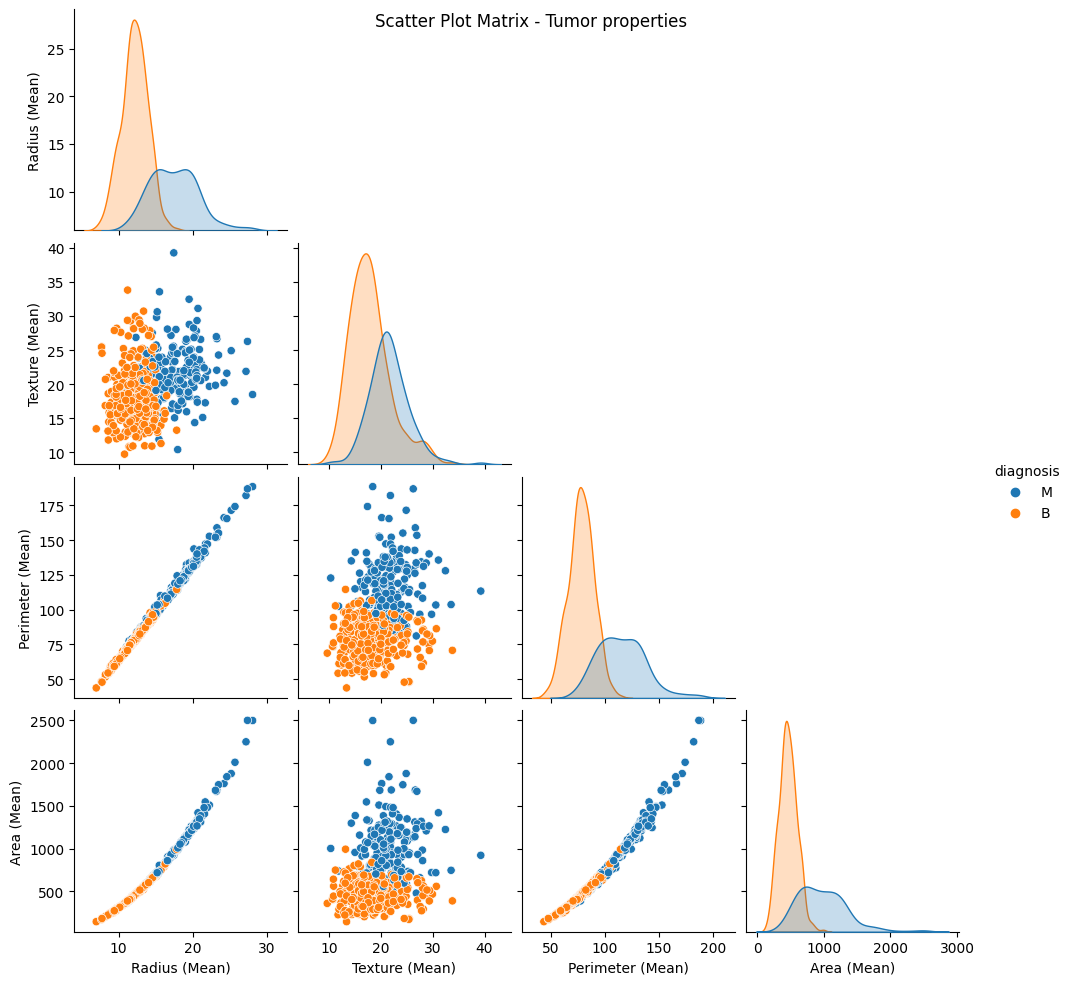

In [ ]:
# Select relevant columns for the scatter plot matrix
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']

# Rename the columns for better visualization labels
column_labels = ['Radius (Mean)', 'Texture (Mean)', 'Perimeter (Mean)', 'Area (Mean)', 'Diagnosis']

# Create a scatter plot matrix
scatter_plot = sns.pairplot(df[columns], hue='diagnosis')

# Set title of the plot
scatter_plot.fig.suptitle('Scatter Plot Matrix - Tumor properties')

# Remove duplicated plots in the upper-right portion
for i in range(len(columns[:-1])):
    for j in range(i + 1, len(columns[:-1])):
        scatter_plot.axes[i, j].set_visible(False)

# Set individual plot titles and labels
for i in range(len(columns[:-1])):
    scatter_plot.axes[-1, i].set_xlabel(column_labels[i])
    scatter_plot.axes[i, 0].set_ylabel(column_labels[i])

plt.show()

The scatter plot matrix provides a visual overview of the relationships between tumor properties and diagnosis, aiding in understanding and predicting tumor malignancy. A rundown of the observations from the scatter plots reveal important insights:

###1. Radius (Mean) vs. Texture (Mean):
 Malignant tumors generally have a larger average radius, suggesting size as a differentiating factor. Texture scores show minimal difference.

###2. Radius (Mean) vs. Perimeter (Mean):
 Malignant tumors exhibit higher scores for both mean radius and mean perimeter, indicating a positive correlation between these properties and malignancy.

###3. Texture (Mean) vs. Perimeter (Mean):
Malignant tumors have higher mean perimeter scores, while mean texture scores are similar between tumor types.

###4. Radius (Mean) vs. Area (Mean):
There is a relationship between higher mean area scores and malignant diagnosis. Larger mean radius values also associate with malignancy.

###5. Texture (Mean) vs. Area (Mean):
Malignant tumors tend to have larger area scores but comparable texture scores to benign tumors.

###6. Perimeter (Mean) vs. Area (Mean):
 Higher scores in both perimeter and area tend to result in more malignant tumor diagnoses.


These findings suggest that size-related measures, such as radius, perimeter, and area, serve as clear indicators of malignancy. Early detection based on these indicators could be beneficial for better patient outcomes.

These results align with previous research and literature supporting the use of these correlations in predicting treatment responses for female patients with tumors. Grimer (2006) claims that size matters in terms of tumor diagnoses. Smaller tumors tend to usually be more often benign in comparison to large tumors (Grimer, 2006). In addition, Babaghorbani et al. (2010) claim that the texture parameters can be helpful in distinguishing between malignant and benign breast tumors.

--This confirms the first perspective in this research that these correlations provide valuable insights in tumor behaviour and can help predict more accurate and effective treatment responses for female patients battling tumors.

<br>

---




--We purposefully displayed some of the best variables in the first scatterplot, but not all variables look as promising. In this scatterplot, four other variables are displayed.

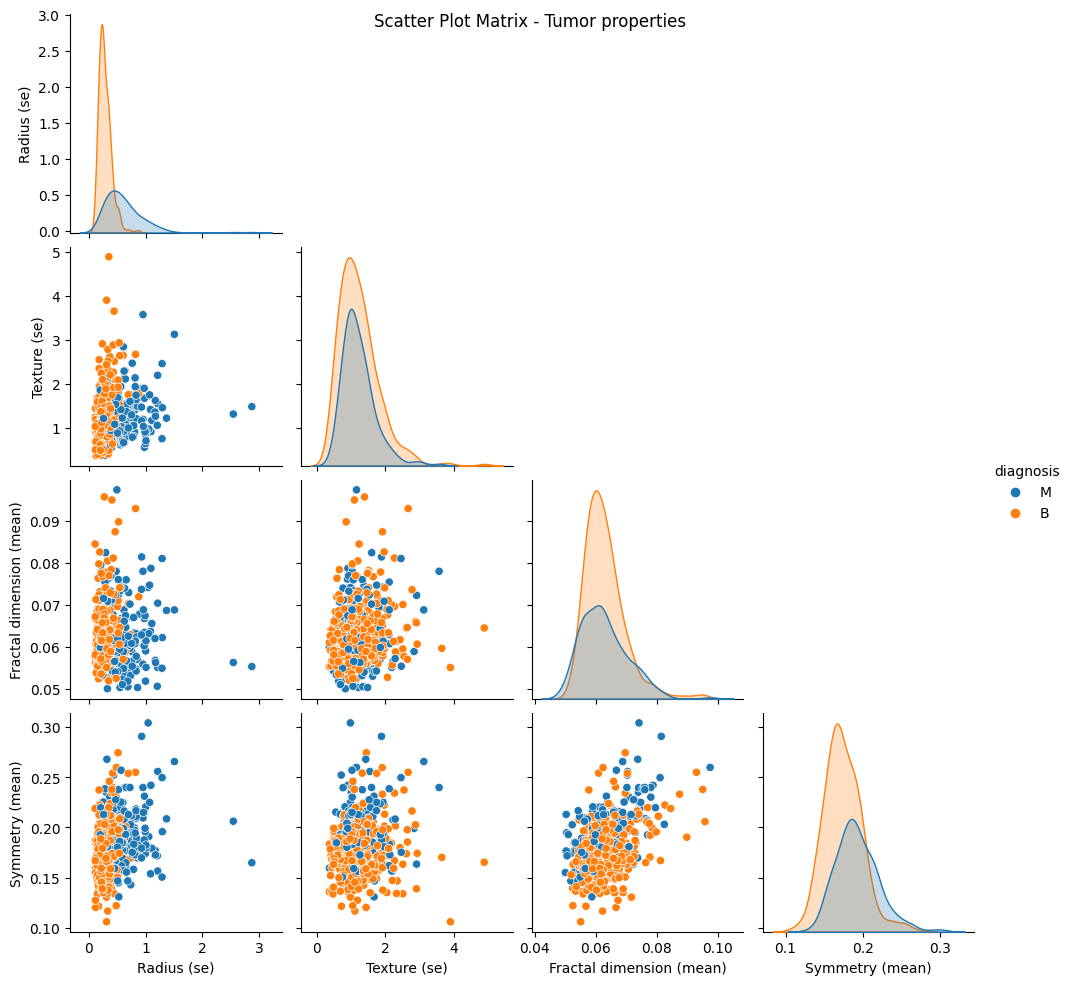

In [ ]:
# Select relevant columns for the scatter plot matrix
columns = ['radius_se', 'texture_se', 'fractal_dimension_mean', 'symmetry_mean', 'diagnosis']

# Rename the columns for better visualization labels
column_labels = ['Radius (se)', 'Texture (se)', 'Fractal dimension (mean)', 'Symmetry (mean)', 'Diagnosis']

# Create a scatter plot matrix
scatter_plot = sns.pairplot(df[columns], hue='diagnosis')

# Set title of the plot
scatter_plot.fig.suptitle('Scatter Plot Matrix - Tumor properties')

# Remove duplicated plots in the upper-right portion
for i in range(len(columns[:-1])):
    for j in range(i + 1, len(columns[:-1])):
        scatter_plot.axes[i, j].set_visible(False)

# Set individual plot titles and labels
for i in range(len(columns[:-1])):
    scatter_plot.axes[-1, i].set_xlabel(column_labels[i])
    scatter_plot.axes[i, 0].set_ylabel(column_labels[i])

plt.show()

Here, we see a whole other picture. The plots don't show clear indicative seperations. The data seems clumped together, with only minor distinction between the diagnoses. It goes to show that not all data in the dataset is good at providing an indication. And it also serves as a reminder to not immediatly and blindly trust the results of the first scatterplot. Correlation is a tricky subject, and more often than not, looks can be deceiving. The correlations in the first scatterplot look very visually appealing, yet might not represent any real correlation in the real world due to the nature of data. It might be statistical coincidences of the dataset, or noise. Besides that, we haven't even looked at the way the data was collected, which could also cause analyses to look overly optimistic.

--These arguments are in favour of our second perspective, that this dataset is insufficient evidence for identifying malignant or benign tumors.

<br>

---




# Violin Plots

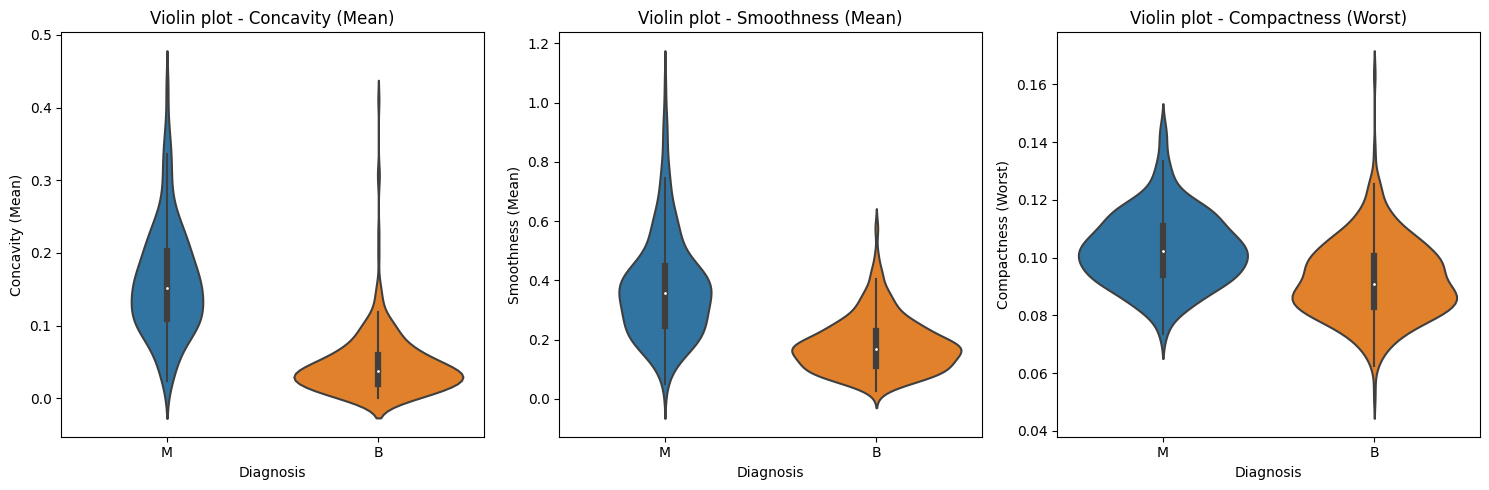

In [ ]:
# Select relevant columns for the violin plot
columns = ['concavity_mean', 'compactness_worst', 'smoothness_mean', 'diagnosis']

# Rename the columns for better visualization labels
column_labels = ['Concavity (Mean)', 'Smoothness (Mean)', 'Compactness (Worst)', 'Diagnosis']

# Create a figure with three subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a violin plot for each feature, grouped by diagnosis
for i, column in enumerate(columns[:-1]):
    sns.violinplot(x='diagnosis', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Violin plot - {column_labels[i]}')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(column_labels[i])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

A violin plot is a type of visualization that combines the features of a box plot and a kernel density plot. It is used to display the distribution of numeric data across different categories or groups. It allows us to observe the concentration of data and identify skewness or asymmetry.

In these violin plots, the x-axis (width) represents the distribution of the data, and the y-axis represents the variables' values. The violin plot displays two figures for each variable, 'm' (malignant) and 'b' (benign).

##Violin plot - Concavity (mean)

Concavity refers to the severity of concave portions of the tumor. In this plot, we can observe that the mean concavity is wider (indicating a greater range of values) around 0.15 for the malignant tumors ('m') and around 0.5 for the benign tumors ('b').

##Violin plot - Smoothness (mean)

Smoothness refers to the variation in local surface areas of the tumor. The plot indicates that the mean smoothness is wider around 0.37 for malignant tumors and around 0.18 for benign tumors.

The two former plots suggests that there could potentially be distinguishing factors between malignant and benign tumors.

##Violin plot - Compactness (worst)

In this plot, we can observe the distribution of compactness values for malignant and benign tumors. In this plot, the overlap is very noticible, even though there is a visible difference in distribution.

Overall, these violin plots provide insights into the relationships between specific tumor properties and the diagnosis (malignant or benign). Some variables visibly display a difference in data distribution between the diagnoses. Even though this seems promising, there is still a lot of overlap in the data between malignant and benign tumors. Compactness (worst) in particular shows that the data is not conclusive enough. In practice, this could mean that wrong diagnoses could be given if decisions are based solely on these insights.

--This falls in line with our second perspective, that these specific traits of a tumor are insufficient evidence to identify a diagnosis.

<br>

---



# Parallel Plots

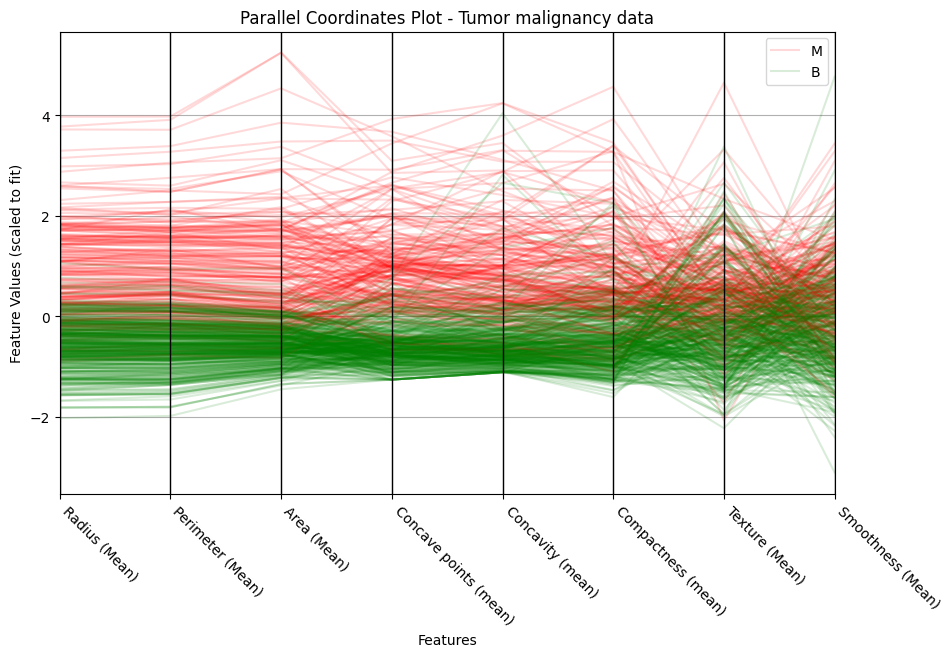

In [ ]:
# Select columns for the parallel coordinates plot
columns = ['radius_mean',  'perimeter_mean', 'area_mean', 'concave points_mean','concavity_mean', 'compactness_mean', 'texture_mean','smoothness_mean',]
column_labels = ['Radius (Mean)', 'Perimeter (Mean)', 'Area (Mean)','Concave points (mean)','Concavity (mean)', 'Compactness (mean)', 'Texture (Mean)','Smoothness (Mean)']


scaler = StandardScaler()
data = df[columns].copy()
data = pd.DataFrame(scaler.fit_transform(data), columns=column_labels)
data['diagnosis'] = df['diagnosis']

# Create the parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates = pd.plotting.parallel_coordinates(data, 'diagnosis', color=['red', 'green'], alpha=0.15)

# Customize the plot
plt.title('Parallel Coordinates Plot - Tumor malignancy data')
plt.xlabel('Features')
plt.xticks(rotation = -45, ha='left')
plt.ylabel('Feature Values (scaled to fit)')


plt.show()


Another way to look at the seperation in values of malignant and benign tumorcells is this parallel plot. With the first three variables (Radius(mean), Perimeter(mean) and Area(mean)) we can clearly see that the majority of the malignant tumorcell values are above 0 and the majority of the benign tumorcell values lie below 0. In the variables Concave points(mean), Concavity(mean) and Compactness(mean) there are a few outliers visible, but there is still a seperation visible. By making value categories, with the values of the tumorcells the malignancy of the tumor could be classified and predicted. It also shows that some categories should be cut out since they provide inconsistent results.

<br>

---






# ML applications

As we've seen, the dataset contains hopeful preliminary results for use in real-life. For the dataset to be of any help in a medical setting however, we need some help. Just by looking at means and distributions, we can't diagnose any patients.

To start diagnosing new patients, some sort of machine learning model can be used that can accurately predict the malignancy of a patients' tumor. But machine learning models are often described as 'black boxes', since we know what we put in and what we get out, but not what happens inside to get to that result (Card, 2021). Let's find out what's inside the box when we apply machine learning to our dataset.

To explore the machine learnability of the dataset, we used 4 machine learning models commonly used in the medical field. The models are Logistic Regression, Decision Tree Classifier, Random Forest Classifier and the Support Vector Machine (Alam & Rahman, 2019; Podgorelec et al., 2002; Schober & Vetter, 2021; Yu et al., 2010).

These four plots describe what features of a tumor it deems most important to determining it's malignancy, along with it's overall accuracy between what it predicted and the actual diagnosis.


### (Hidden) Defining the Feature Importance function code

In [ ]:
import matplotlib.cm as cm
warnings.filterwarnings("ignore", category=DeprecationWarning)

def plotMLimportance(features):

    # Separate features (X) and target variable (y)
    X = df[features]
    y = df['diagnosis']

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Perform feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and test various classifiers
    classifiers = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC()
    ]

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    fig.suptitle("Feature Importance Comparison", fontsize=16)

    for classifier, ax in zip(classifiers, axes.flatten()):
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Plot feature importance for classifiers that support it
        if hasattr(classifier, 'feature_importances_'):
            importances = classifier.feature_importances_
            feature_names = X.columns
            indices = np.argsort(importances)

            colormap = cm.get_cmap('YlOrRd', len(indices))
            colors = colormap(range(len(indices)))

            ax.barh(range(len(indices)), importances[indices], color=colors, align='center')
            ax.set_yticks(range(len(indices)))
            ax.set_yticklabels([feature_names[i] for i in indices])
            ax.set_xlabel('Relative Importance')
            ax.set_title(f"{classifier.__class__.__name__} - Accuracy: {round(accuracy, 2)}")

        if classifier.__class__.__name__ == "SVC":
            # Calculate permutation importance
            result = permutation_importance(classifier, X_test, y_test, n_repeats=10, random_state=42)
            feature_importance = result.importances_mean
            feature_names = X.columns

            indices = np.argsort(feature_importance)
            colormap = cm.get_cmap('YlOrRd', len(indices))
            colors = colormap(range(len(indices)))

            ax.barh(range(len(indices)), feature_importance[indices], color=colors, align='center')
            ax.set_yticks(range(len(indices)))
            ax.set_yticklabels([feature_names[i] for i in indices])
            ax.set_xlabel('Permutation Importance')
            ax.set_title(f"Support Vector Machine - Accuracy: {round(accuracy, 2)}")

        if classifier.__class__.__name__ == "LogisticRegression":
            # Get feature weights from the trained Logistic Regression model
            feature_weights = classifier.coef_[0]
            feature_names = X.columns

            indices = np.argsort(feature_weights)
            colormap = cm.get_cmap('YlOrRd', len(indices))
            colors = colormap(range(len(indices)))

            ax.barh(range(len(indices)), feature_weights[indices], color=colors, align='center')
            ax.set_yticks(range(len(indices)))
            ax.set_yticklabels([feature_names[i] for i in indices])
            ax.set_xlabel('Coefficient Weight')
            ax.set_title(f"Logistic Regression - Accuracy: {round(accuracy, 2)}")

    plt.tight_layout()
    plt.show()


##Feature Importance

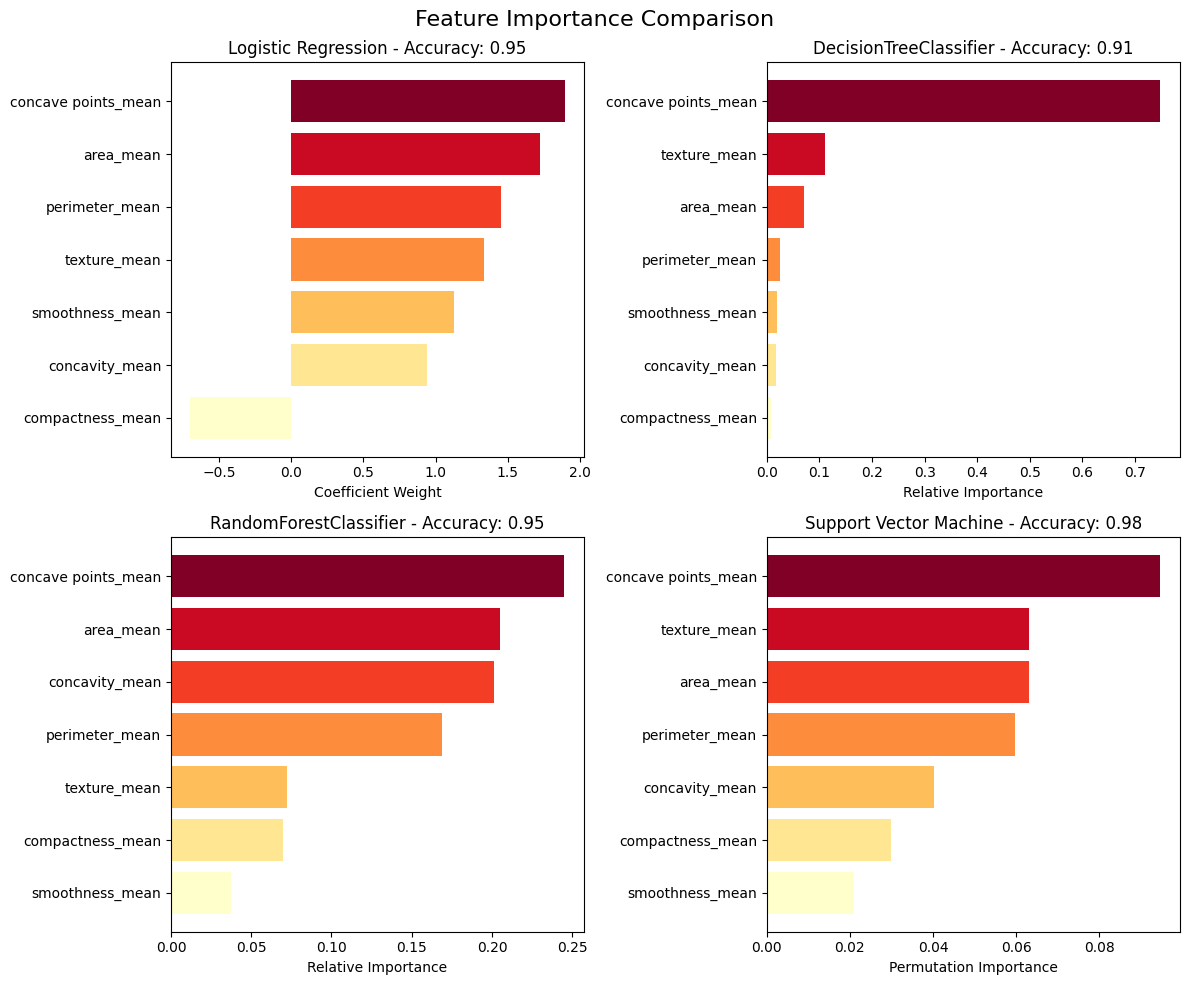

In [ ]:
# The highest contributing features have been preselected for this graph
features = ['concave points_mean','texture_mean', 'concavity_mean', 'area_mean', 'perimeter_mean', 'compactness_mean', 'smoothness_mean']
plotMLimportance(features)

Notice anything?

Concave points_mean seems to be a really important aspect for determining a tumors' malignancy for all four machine learning models. That means that a higher concave points_mean reading could significantly sway the diagnosis result given by these ML models. The question is if this assumption by the algorithm - that higher concave points_mean indicates malignancy - is accurate in the real world.


Blindly integrating machine learning into analyzing medical data could be dangerous. Machine learning algorithms can identify patterns in data that are  non-existent in real-life by a process called 'overfitting'. This results in a really high accuracy score on testing data (0.98 on the SVM model can be considered very high), but less convincing results in the real world. There are many blind spots that should be but often can't be avoided purely working of off data. Assumptions should be backed by research, not by statistical coincidence.

--This supports our second perspective.

That being said, it turns out that concave points are a real indicator of malignant tumors, according to actual research done by Narasimha et al. (2013) and others. That means that our ML models were correct to assume it to be an important factor. Still, ML models should not be built on one feature only. Decisions have to be made on which features make the cut and get included, and which don't. Let's find out why this is very hard to do when working with data only and no actual research.

<br>

---



# Interactively exploring the features used for machine learning

To show you how difficult it is to find the right features to use while designing a ML model, we have made an interactive display. It plots the accuracy of a machine learning model - in this case the Logistic Regression - while it is being trained on the dataset. The accuracy tells us how many times it correctly predicts a diagnosis, by assigning weights (biases) to certain variables. After being trained, we can use the model to predict the diagnosis of unseen tumors. This can be observed in the confusion matrix on the right side.

-- Note that the accuracy is only an indicator of how well the ML model might perform for predicting diagnoses. Other important aspects such as overfitting are left out of the picture.

###(Hidden) Defining the Interactive Display function code

Defining a function to calculate accuracy and plot learning curve based on selected variables and chosen classifier:

In [ ]:
def plotAccuracyCurve(button):
    # Create an output widget for displaying the plot
    with plot_output:
        clear_output(wait=True)

        # Get the indices of the selected variables
        selected_indices = [i for i, checkbox in enumerate(checkboxes) if checkbox.value]

        # Select the variables based on the indices
        selected_variables = [variable_list[i] for i in selected_indices]

        # Extract the selected variables from the data
        X = df[selected_variables]

        # Scale the input variables
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

        # Create an instance of the logistic regression model (SGDClassifier with 'log' loss)
        model = SGDClassifier(loss='log_loss', random_state=42)

        # Initialize variables to track accuracy during training
        epochs = 50
        batch_size = 10
        n_batches = len(X_train) // batch_size
        accuracies = []

        # Training loop
        for epoch in range(epochs):
            for batch in range(n_batches):
                # Get the current batch
                batch_start = batch * batch_size
                batch_end = (batch + 1) * batch_size
                X_batch = X_train[batch_start:batch_end]
                y_batch = y_train[batch_start:batch_end]

                # Train the model on the current batch
                model.partial_fit(X_batch, y_batch, classes=np.unique(y))

            # Calculate accuracy on the test set after each epoch
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

        # Plot the accuracy over the training iterations
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].plot(range(1, epochs + 1), accuracies)
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy')
        axes[0].set_title('Accuracy during Training Curve')

        # Display the confusion matrix plot
        cm = confusion_matrix(y_test, y_pred)
        im = axes[1].imshow(cm, cmap='RdYlGn', vmax=25,vmin=24)
        axes[1].set_title('Confusion Matrix')

        # Add text and background colors to the cells of the confusion matrix
        labels = [['TP', 'FP'], ['FN', 'TN']]
        rows, cols = cm.shape
        for i in range(rows):
            for j in range(cols):
                axes[1].text(j, i, f'{labels[i][j]}\n{cm[i, j]}', ha='center', va='center')
        axes[1].set_xticks([])
        axes[1].set_yticks([])

        plt.tight_layout()
        plt.show()


Initializing variables:

In [ ]:
# Create a list of available variables
variable_list = ['concave points_mean', 'texture_mean', 'concavity_mean', 'area_mean', 'perimeter_mean', 'compactness_mean', 'smoothness_mean']

y = df['diagnosis']

# Create checkboxes for each variable
checkboxes = [widgets.Checkbox(value=(index<1), description=var) for index, var in enumerate(variable_list)]
plot_output = Output()

button = widgets.Button(description="Train model")
button.on_click(plotAccuracyCurve)

# Create text widgets for labels
controls = VBox([widgets.Label('Select variables:'), widgets.VBox(checkboxes), button])

##Feature Importance Visualized by Interactive Display

Try selecting different combinations of variables to train the ML model on. Notice how quickly the curve gets out of control because of the inclusion of too many variables.

Try to get as high of a green score in the upper left and lower right fields of the confusion matrix and as low of a red score in the upper right and lower left fields. This indicates the amount of correct predictions the model has made.

In [ ]:
# Display the checkboxes, buttons, and initial plot
display(HBox([controls, plot_output]))

# Plot accuracy curve (testSize=0.33, N=379)
plotAccuracyCurve(None)

Would it be worse for a tumor to get misclassified as benign or malignant?

Arguably, both. False missclassifications as malignant (FP) can lead to more redundant surgical operations to remove benign tumors. The opposite (FN) will lead to the development of cancer if left overlooked and untreated.

Unfortunately, these are the trade-offs that we would have to making going purely off of machine learning applications. In the interactive display, you've already seen how difficult it is to make inclusions or exclusions with just 6 variables. Imagine having 12, 30 or 100+ variables. We need additional resources such as formal research to assist us in feature selection, before we let machines make assumptions about the real world on their own.

<br>


---



#Conclusion

#### There is no denying that the dataset contains impressive theoretical insights. Even though our initial results seem very promising, we have to remain sceptical in its use in a real world setting. More research should be done about the correlations within the dataset before machine learning can/should be applied.

<br>



---






#Work distribution
The work distribution for the task was well organized, and communication among the team members was effective. Each team member had specific responsibilities, ensuring a smooth workflow.

In particular, Yasmina played a role in providing explanations for most of the visualizations and had given one argument. She took the lead in ensuring the clarity and accuracy of the content, carefully checking for any spelling errors. Additionally, She also looked for a possible extra visualisation to enhance the overall presentation.

Guido was responsible for creating the final representation of each graph. This includes all text and code for the entire data story.

Prishent suggested a dataset to the group along with some background information of the dataset and variables. He also suggested one of the perspectives of what could be shown with the dataset. Additionally he helped in writing the story of the visualisations.

Gregorius was tasked with the co-responsibility of explaining visualizations.
In addition to explaining visualizations, He was also co-responsible for adding arguments to support the findings and conclusions presented. This involved searching for relevant literature, critically analyzing the data, and formulating arguments that strengthened the overall narrative of our data.

 # Reflection

After the feedbacksession we brought more structure in our Data Story Project. We seperated our two perspectives and the difference we visualized became clear. All our visualisations were clear for the TA. We only modified the second perspective so that the difference in perspective was better understandable.
In the first paralelplot we made, the variables were mixed. We sorted the variables so, that the distribution was clear. We also used different collors in the visualisations to highlight the difference between malignant and benign and show the importance of specific variables.

The collaboration within the team was characterized by open communication, allowing for seamless coordination and alignment of efforts. By dividing tasks and leveraging individual strengths, the team successfully achieved a cohesive and comprehensive outcome.

#Literature

Alam, M. Z., & Rahman, M. M. (2019). A Random Forest based predictor for medical data classification using feature ranking. Informatics in Medicine Unlocked, 15, 100180. https://doi.org/10.1016/j.imu.2019.100180

Babaghorbani, P., Parvaneh, S., Ghassemi, A. R., & Manshai, K. (2010, June). Sonography images for breast cancer texture classification in diagnosis of malignant or benign tumors. In 2010 4th International Conference on Bioinformatics and Biomedical Engineering (pp. 1-4). IEEE.

Card, D. (2021, 14 juli). The “black box” metaphor in machine learning - Dallas Card - Medium. Medium. https://dallascard.medium.com/the-black-box-metaphor-in-machine-learning-4e57a3a1d2b0

Grimer, R. J. (2006). Size matters for sarcomas!. The Annals of The Royal College of Surgeons of England, 88(6), 519-524.

Narasimha, A., Vasavi, B., & Kumar, M. H. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. International journal of applied & basic medical research, 3(1), 22. https://doi.org/10.4103/2229-516x.112237

Podgorelec, V., Kokol, P., Stiglic, B., & Rozman, I. (2002). Decision Trees: An Overview and Their Use in Medicine. Journal of Medical Systems, 26(5), 445–463. https://doi.org/10.1023/a:1016409317640

Schober, P., & Vetter, T. (2021). Logistic Regression in Medical Research. Anesthesia & Analgesia, 132(2), 365–366. https://doi.org/10.1213/ane.0000000000005247

Silva, J. M., Domínguez, G., Silva, J., Garcia, J. M., Sánchez, A. L., Rodriguez, O. M. H., Provencio, M., España, P., & Bonilla, F. (2001). Detection of epithelial messenger RNA in the plasma of breast cancer patients is associated with poor prognosis tumor characteristics. PubMed, 7(9), 2821–2825. https://pubmed.ncbi.nlm.nih.gov/11555599

Yu, W., Liu, T., Valdez, R., Gwinn, M., & Khoury, M. J. (2010). Application of support vector machine modeling for prediction of common diseases: the case of diabetes and pre-diabetes. BMC Medical Informatics and Decision Making, 10(1). https://doi.org/10.1186/1472-6947-10-16